In [1]:
import pandas as pd
import numpy as np

In [2]:
alsi = pd.read_csv("Dataset/Mercury/alsimap_smooth_032015.png.csv", header = None) 
casi = pd.read_csv("Dataset/Mercury/casimap_smooth_032015.png.csv", header = None) 
fesi = pd.read_csv("Dataset/Mercury/fesimap_smooth_032015.png.csv", header = None) 
mgsi = pd.read_csv("Dataset/Mercury/mgsimap_smooth_032015.png.csv", header = None) 
ssi = pd.read_csv("Dataset/Mercury/ssimap_smooth_032015.png.csv", header = None) 
top = pd.read_csv("Dataset/Mercury/mercury-albedo-top-half.png.csv", header = None) 
bottom = pd.read_csv("Dataset/Mercury/mercury-albedo-resized-bottom-half.png.csv", header = None) 

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'bottom half of Mercury Albedo')

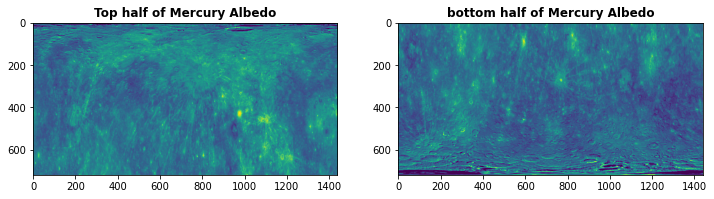

In [4]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(bottom)
plt.title('bottom half of Mercury Albedo', fontweight="bold")

### Filling gaps

Text(0.5, 1.0, 'ALSI without gaps')

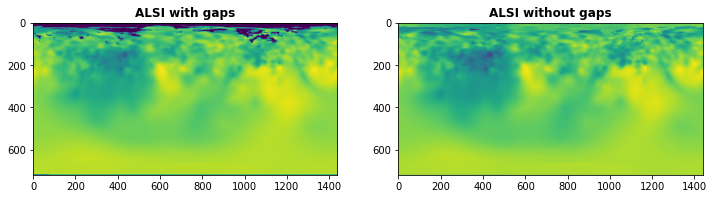

In [5]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(alsi)
plt.title('ALSI with gaps', fontweight="bold")

alsi_mean = alsi.replace(0E+00, alsi.mean())

plt.subplot(1, 2, 2)
plt.imshow(alsi_mean)
plt.title('ALSI without gaps', fontweight="bold")

In [6]:
alsi_mean.std().sum()

122.94801210708867

Text(0.5, 1.0, 'ALSI without gaps')

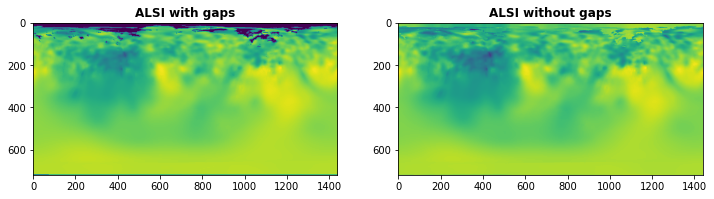

In [7]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(alsi)
plt.title('ALSI with gaps', fontweight="bold")

alsi_median = alsi.replace(0E+00, alsi.median())

plt.subplot(1, 2, 2)
plt.imshow(alsi_median)
plt.title('ALSI without gaps', fontweight="bold")

In [8]:
alsi_median.std().sum()

122.29112638414719

<font color='red'> On comparing the standard deviations of both data, imputing gaps with median is giving better results.

In [18]:
alsi = alsi_median

### Data split

In [19]:
x_train = top
y_train = alsi
x_test = bottom
y_test = alsi

We are not using XGBRegressor for this problem because size of dataset is large and computation time of XGBRegressor is very long.

In [20]:
from numpy import asarray
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense

In [33]:
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='softmax'))
	model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
	model.compile(loss='mse', optimizer='adam')
	return model

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]
model = get_model(n_inputs, n_outputs)
model.fit(x_train, y_train, verbose=0, epochs=100)
yhat = model.predict(y_test)
print('Predicted: %s' % yhat[0])

Predicted: [0.84932387 0.89592785 0.878165   ... 0.8574476  0.86278975 0.88132167]


In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(bottom,yhat)

0.2447734583672814

Text(0.5, 1.0, 'Predicted Image')

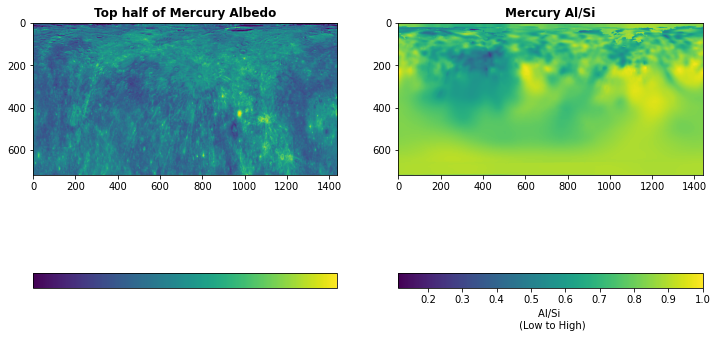

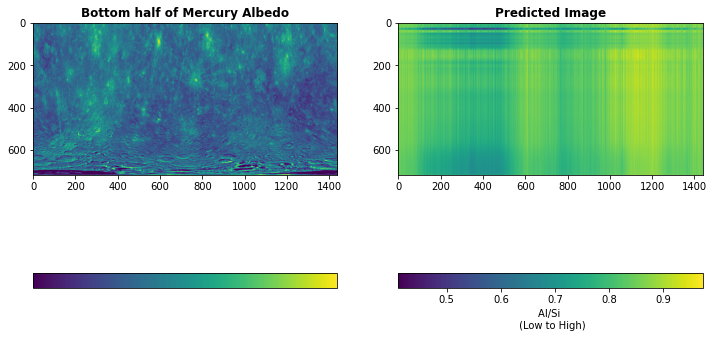

In [35]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(alsi)
plt.title('Mercury Al/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Al/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(yhat)
plt.colorbar(orientation='horizontal', label= 'Al/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")